<a href="https://colab.research.google.com/github/Ramaseshanr/anlp/blob/master/CosDistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       D0    D1    D2    D3    D4    D5    D6    D7    D8    D9   D10
D0    0.0   4.0  90.0  45.7  50.6  64.8  41.9  64.6  74.6  72.1  56.9
D1    4.0   0.0  90.0  46.9  52.6  66.0  42.3  67.3  75.3  73.7  59.0
D2   90.0  90.0   0.0  56.5  66.1  71.8  59.5  81.4  57.6  41.7  61.7
D3   45.7  46.9  56.5   0.0  39.5  46.6  28.5  58.5  53.9  45.2  49.7
D4   50.6  52.6  66.1  39.5   0.0  29.5  48.9  53.8  60.8  31.9  36.1
D5   64.8  66.0  71.8  46.6  29.5   0.0  58.1  54.3  66.9  40.5  61.2
D6   41.9  42.3  59.5  28.5  48.9  58.1   0.0  63.0  56.4  53.5  50.5
D7   64.6  67.3  81.4  58.5  53.8  54.3  63.0   0.0  54.3  51.1  69.1
D8   74.6  75.3  57.6  53.9  60.8  66.9  56.4  54.3   0.0  50.3  69.2
D9   72.1  73.7  41.7  45.2  31.9  40.5  53.5  51.1  50.3   0.0  44.5
D10  56.9  59.0  61.7  49.7  36.1  61.2  50.5  69.1  69.2  44.5   0.0


Document Rank for the query  D0
D0      0.0
D1      4.0
D6     41.9
D3     45.7
D4     50.6
D10    56.9
D7     64.6
D5     64.8
D9     72.1
D8     74.6
D2    

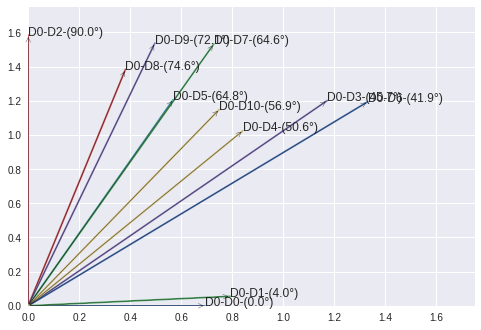

In [9]:
#  MIT License
#  Copyright (c) 2019.
#  Project Name: ANLP
#  File name: code.py
#  Last modification date: 2/28/19 2:31 PM
#  Author: ramaseshan
#  Email:ramaseshanr@yahoo.com
#  /CosineDistance.py
# 

from numpy import *
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def cosine_distance(a,b):
    return dot(a,b)/(norm(a)*norm(b))

def find_end_points(point, angle, length):
    ''' 
    #Source - https://stackoverflow.com/questions/28417604/plotting-a-line-from-a-coordinate-with-and-angle
    #
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = length * math.sin(math.radians(angle))
    endx = length * math.cos(math.radians(angle))

    # plot the points
    #fig = plt.figure()
    #ax = plt.subplot(111)

    return ([x,endx],[y,endy])
    #ax.plot([x, endx], [y, endy])
    

    #return fig
column_header = ['D0','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10']
row_header = ['D0','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10']
doc_term = array([
    #D0   D1   D2   D3   D4   D5   D6   D7   D8   D9   D10  D11
    [0.1, 0.1, 0.0, 0.1, 0.2, 0.0, 0.1, 0.9, 0.9, 0.3, 0.0, 0.8],
    [0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.9, 0.0, 0.3, 0.0, 0.8],
    [0.0, 0.0, 0.9, 0.2, 0.3, 0.1, 0.7, 0.0, 0.2, 0.7, 0.5, 0.5],
    [0.0, 0.0, 0.9, 0.9, 0.0, 0.1, 0.9, 0.3, 0.8, 0.4, 0.1, 0.4],
    [0.0, 0.0, 0.0, 0.2, 0.5, 0.9, 0.3, 0.7, 0.4, 0.6, 0.0, 0.3],
    [0.5, 0.6, 0.0, 0.7, 0.3, 0.3, 0.9, 0.1, 0.0, 0.0, 0.0, 0.3],
    [0.0, 0.0, 0.8, 0.6, 0.6, 0.6, 0.0, 0.1, 0.4, 0.9, 0.3, 0.1],
    [0.35, 0.4, 0.0, 0.5, 0.5, 0.1, 0.7, 0.1, 0.5, 0.3, 0.8, 0.1],
    [0.3, 0.3, 0.0, 0.9, 0.8, 0.7, 0.7, 0.8, 0.0, 0.6, 0.8, 0.0],
    [0.0, 0.0, 0.5, 0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.4, 0.5, 0.3]
])

cos_list = []
pd_cols = []

for i in range(0,11):
    for j in range(0,11):
        cos_value = cosine_distance(transpose(doc_term[:, [i]]), doc_term[:, [j]])
        cos_list.append( asscalar( around(math.degrees(math.acos(min(max(cos_value,-1.0),1.0))), decimals=1) ))
    pd_cols.append(cos_list)
    cos_list = []
df = pd.DataFrame(pd_cols, columns=column_header,index=row_header)
print(df)


fig = plt.figure()
ax = plt.subplot(111)
ax.set_ylim([0, 1.75])
ax.set_xlim([0, 1.75])

ref_doc = 0
for i in range (0,11):
    X, Y = find_end_points([0, 0], df.iloc[ref_doc][i], norm(doc_term[:, [i]]))
    ax.plot(X,Y)
    ax.annotate("", xy=(X[1],Y[1]), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))    
    ax.text(X[1],Y[1],"D" + str(ref_doc) + "-"+"D"+str(i)+"-("+str(df.iloc[ref_doc][i]) +u"\u00b0"+")")
    #ax.add_patch(Arc((0,0), .25+i/12.0, .25+i/12.0, theta1=0.0, theta2=df.iloc[0][i], edgecolor='r', lw=1.5, label = str(df.iloc[0][i])+u"\u00b0"))
fig.savefig('CosineDistance.pdf')
fig.show()
query = "D"+ str(ref_doc)
rank_order = df.sort_values(query)
print ("\n\nDocument Rank for the query ", query)
print(rank_order[query])

